In [8]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [9]:
from image_reader import get_img, img2batch

In [15]:
tflite_path = "./weights/android/u2net_pretrained_quantization_noPrePost.tflite"

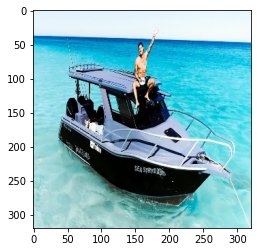

In [16]:
## Get input
demo = get_img(1)
plt.imshow(demo)
x = img2batch(demo)

In [17]:
model_interpreter = tf.lite.Interpreter(tflite_path)

In [18]:
np_input = x.detach().numpy()

print("Input Shape:", np_input.shape)

if tf.__version__ > '2.5':
    input_tf = tf.constant(np_input)
    tflite_signature = model_interpreter.get_signature_runner()
    prediction = tflite_signature(input=input_tf)['output']
else:
    model_interpreter.allocate_tensors()
    input_details = model_interpreter.get_input_details()
    output_details = model_interpreter.get_output_details()
    model_interpreter.set_tensor(input_details[0]['index'], np_input)
    model_interpreter.invoke()
    prediction = model_interpreter.get_tensor(output_details[0]['index'])

print("Input Shape:", np_input.shape)
print("Output Shape:", prediction.shape)

Input Shape: (1, 3, 320, 320)
Input Shape: (1, 3, 320, 320)
Output Shape: (1, 1, 320, 320)


In [19]:
mask = prediction.squeeze()
plt.subplot(1,2,1)
plt.imshow(demo)
plt.subplot(1,2,2)
plt.imshow(mask)